# wordcloud 환경세팅

In [1]:
!pip install koNLPy

In [2]:
!pip install soynlp

In [3]:
!pip show soynlp

Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /Users/jeon-eunji/opt/anaconda3/lib/python3.9/site-packages
Requires: scikit-learn, psutil, numpy, scipy
Required-by: 


In [8]:
!pip install wordcloud

### Konlpy
- morphs() -- 학습되어있는 형태소 단위로 토큰화, 품사 태깅 x
- pos() -- 학습되어있는 형태소 단위로 토큰화, 품사 태깅 o
- nouns() -- 학습되어있는 명사 단위로 토큰화
- sentences() -- 문장 단위 토큰화 --*kkma.sentences()만 됨- 

### Soynlp
- 띄워쓰기 기반 토큰화
- RegexTokenizer() -- 문장에서 규칙성이 보이는 부분만 우선 추출
- MaxScoreTokenizer() -- 토큰화를 원하는 단어에 대해 점수를 부여해서 우선 추출

### konlpy vs. Soynlp
- Konlpy -- 띄워쓰기가 없어도 토큰화 가능하나 고유 명사 추출 어려움
- soynlp -- 띄워쓰기 제대로 안되어 있으면 토큰화 되지 않으나 고유 명사 추출 가능

- 고유 명사를 추출하기 위한 Soynlp
- 띄어쓰기와 무관한 토큰화 Konlpy

----참고 : https://github.com/chiheon/Korean-NLP
        

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from wordcloud import WordCloud
from soynlp.tokenizer import LTokenizer
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()
tokenizer

#graph에 retina display
%config InlineBackend.figure_format = 'retina'

/Users/jeon-eunji/opt/anaconda3/lib/python3.9/site-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


# 분석할 데이터 가져오기

In [4]:
import glob
paths = glob.glob("*.*")
paths

['02-1. 크롤링된 데이터를 이용해 wordcloud 진행하기[뉴스데이터].ipynb',
 '02. 크롤링된 데이터를 이용해 wordcloud 진행하기.ipynb',
 '교통약자10000.csv',
 "01-1. 네이버 뉴스 '교통약자' 검색해서 뉴스 제목 크롤링 하기.ipynb",
 '01. 교통약자 키워드 크롤링 in riss (완성).ipynb',
 '교통약자_csv.csv']

In [6]:
paths[2]

'교통약자10000.csv'

In [7]:
df = pd.read_csv(paths[2])
df

,0
0,신협 교통약자 위해 5년간 차량 18대 기부
1,코레일 교통약자 위한 '맞춤형 스마트 내비게이션' 개발 착수
2,진주시 교통약자 바우처택시 50대 발대식 개최
3,신협 교통약자 위한 어부바 차량’ 기부
4,진주시 교통약자 위한 '바우처택시' 17일부터 본격 운행
...,...
9995,세종시의회 세종시 교통약자 이동편의 증진을 위한 연구모임 최종 간담회
9996,대전시-KISTI 교통약자 이동지원 서비스 체험단 모집
9997,[2020 경기도의회 정책토론 대축제] 교통약자와 스몸비 안전사고 예방책
9998,세종시 교통약자 이동편의 증진 내년에 조례로 법제화 될 듯


## noun_extractor를 이용해서 명사 추출해서 최대한 명사만 추출해 워드클라우드 생성

In [8]:
from soynlp.noun import LRNounExtractor

In [ ]:
%%time
noun_extractor = LRNounExtractor(verbose = True)
noun_extractor.train(df)
nouns = noun_extractor.extract()

In [13]:
def preprocess(text):
    text = re.sub('\\\\n', ' ', text)
    return text

df_noun = df['0'].apply(preprocess)

In [14]:
def displayWordCloud(data = None,
                    backgroundcolor = 'white', 
                    width = 1200,
                    height = 900):
    wordcloud = WordCloud(
        font_path = fontpath,
        stopwords = stopwords_kr,
        background_color = backgroundcolor,
        width = width, height = height).generate(data)
    plt.figure(figsize = (20, 15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [15]:
#클라우드로 나타내고 싶은 폰트 설정
fontpath = '/Users/jeon-eunji/Library/Fonts/AppleSDGothicNeoB.ttf'

In [36]:
#불용어 설정
stopwords_kr = ['교통약자']

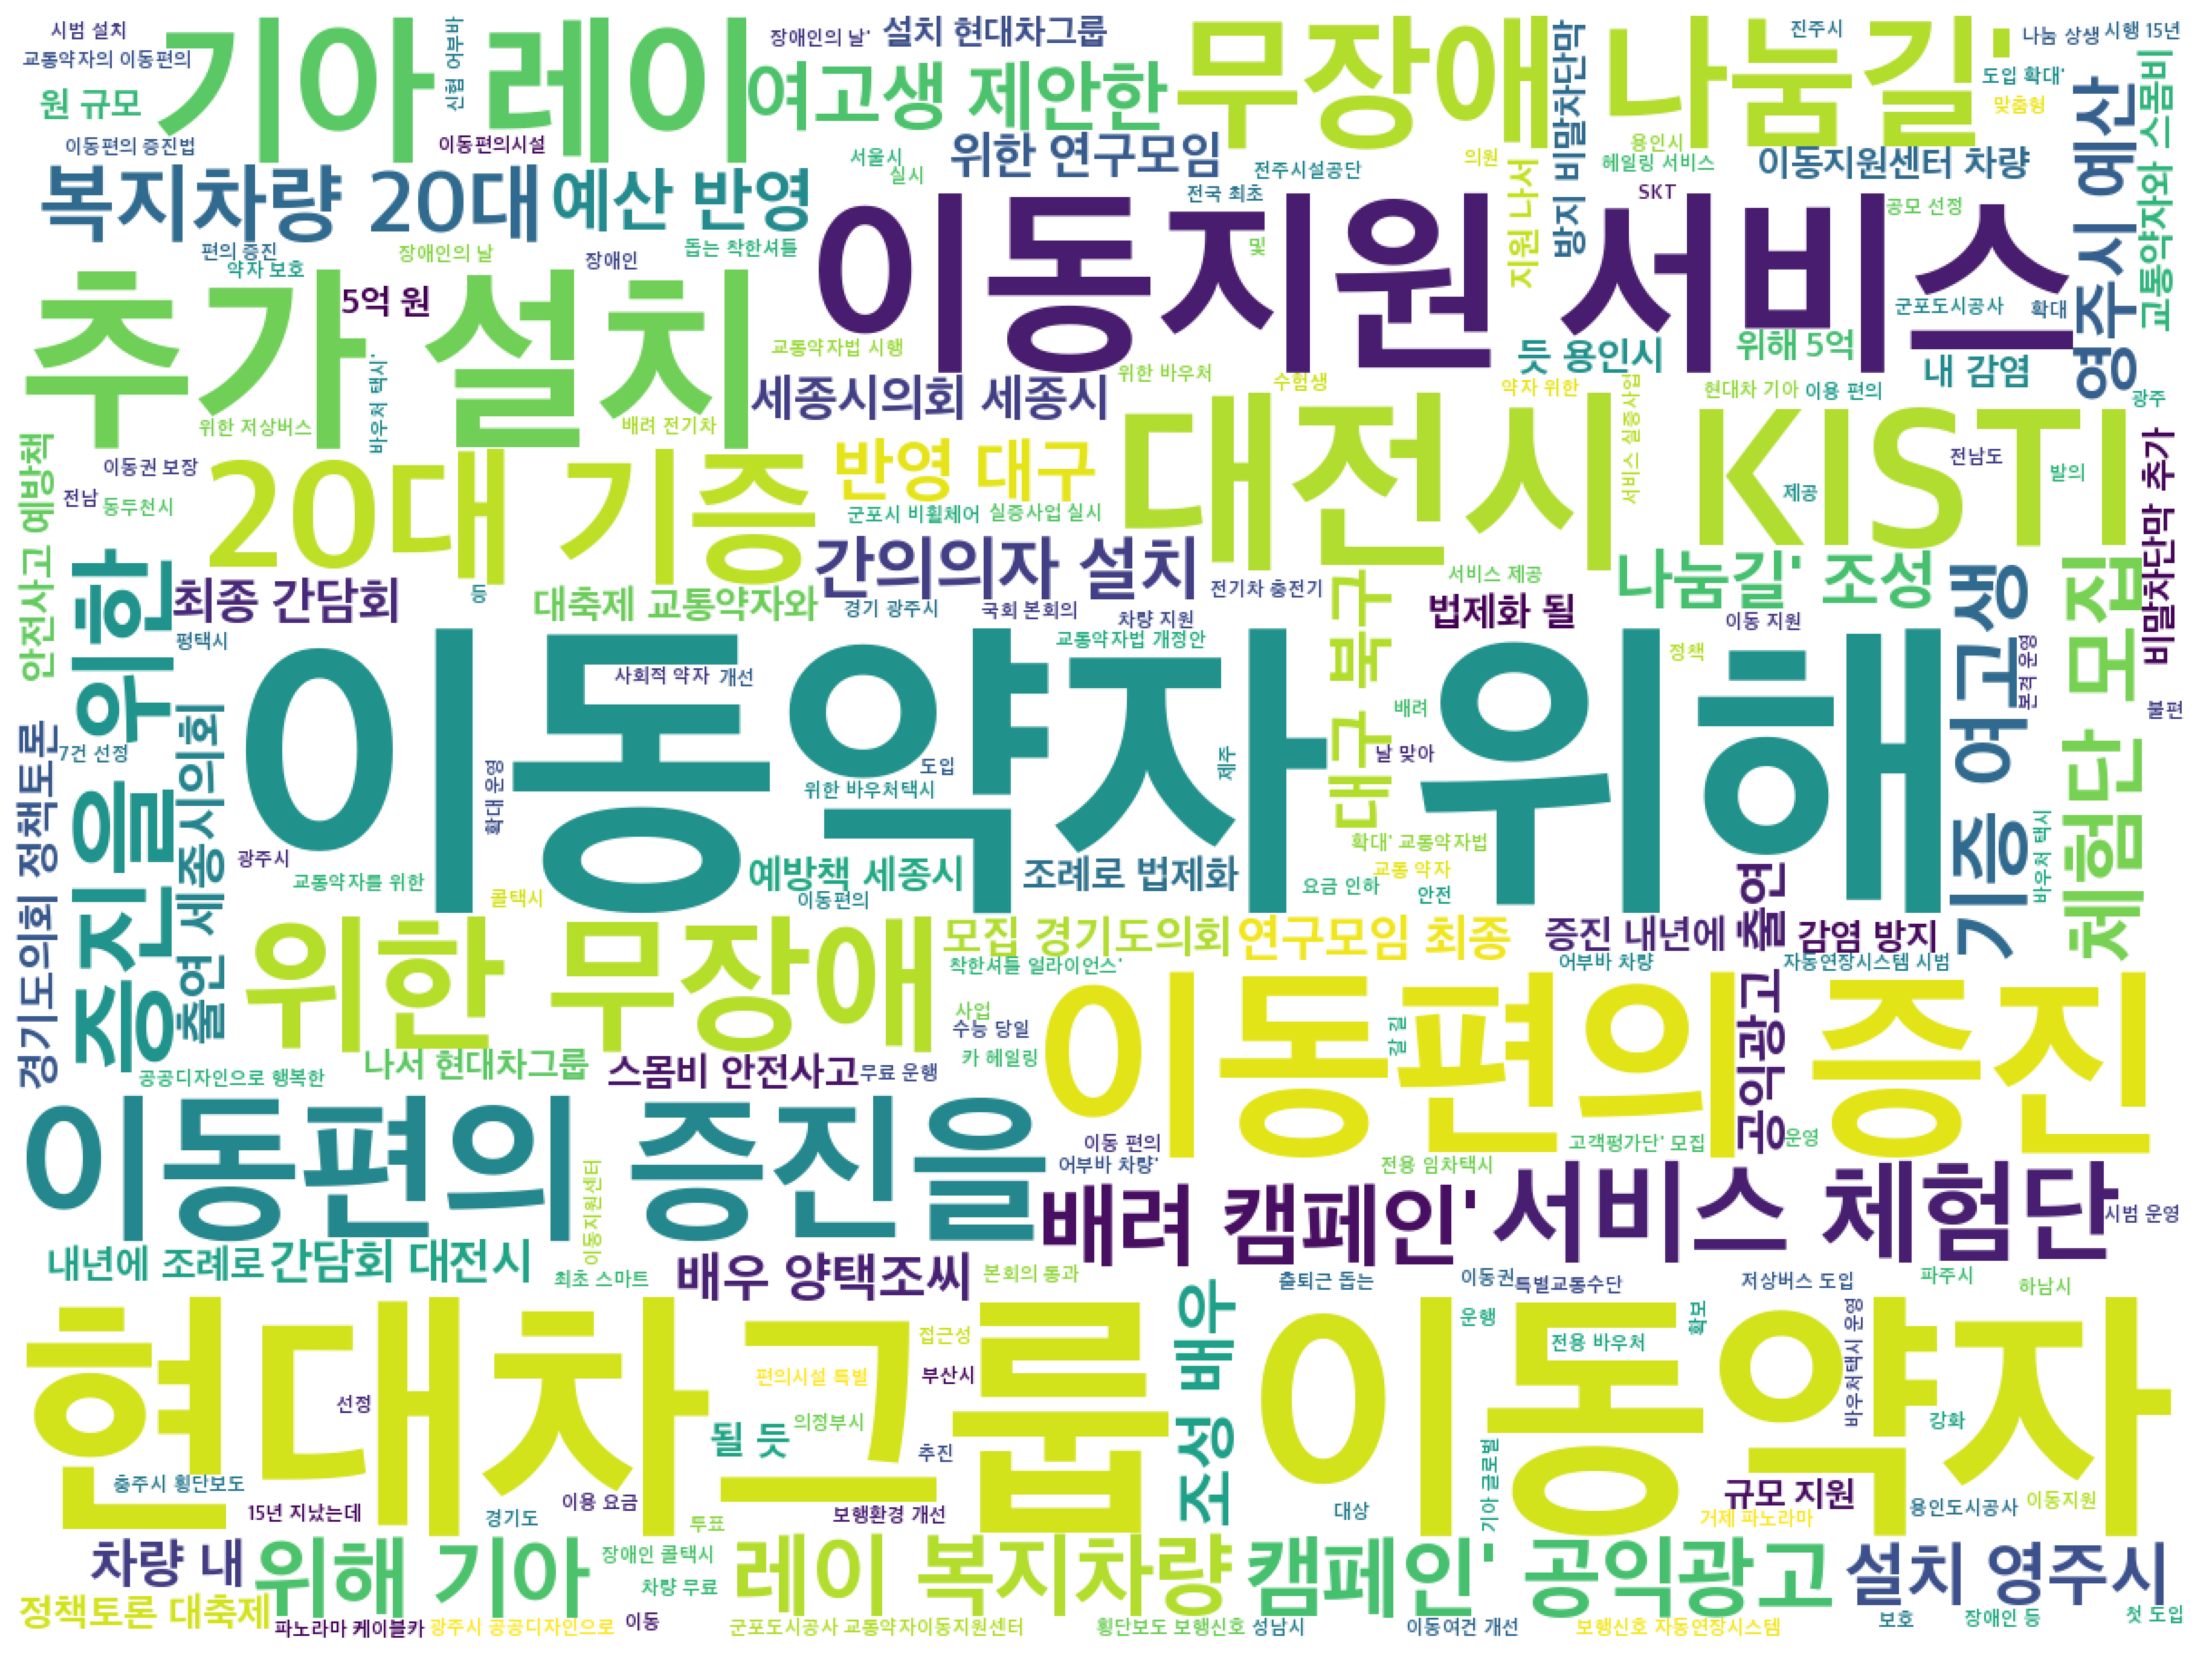

CPU times: user 2.21 s, sys: 167 ms, total: 2.38 s
Wall time: 2.44 s


In [37]:
%time displayWordCloud(' '.join(df_noun))